In [ ]:
from sklearn.model_selection import cross_val_predict
import sklearn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
os.chdir('C:/Users/Gary/Documents/Python Scripts/House prices')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [ ]:
train.MasVnrType.fillna("None", inplace = True) 
train.MasVnrArea.fillna(0, inplace = True) 
train.BsmtQual.fillna("NB", inplace = True) 
train.BsmtCond.fillna("NB", inplace = True)
train.BsmtExposure.fillna("NB", inplace = True)
train.BsmtFinType1.fillna("NB", inplace = True)
train.BsmtFinType2.fillna("NB", inplace = True)
train.Electrical.fillna("SBrkr", inplace = True)
train.FireplaceQu.fillna("NF", inplace = True)
train.GarageType.fillna("NG", inplace = True)
train.GarageFinish.fillna("NG", inplace = True)
train.GarageQual.fillna("NG", inplace = True)
train.GarageCond.fillna("NG", inplace = True)

In [ ]:
test.MasVnrType.fillna("None", inplace = True) 
test.BsmtQual.fillna("NB", inplace = True) 
test.BsmtCond.fillna("NB", inplace = True)
test.BsmtExposure.fillna("NB", inplace = True)
test.BsmtFinType1.fillna("NB", inplace = True)
test.BsmtFinType2.fillna("NB", inplace = True)
test.Electrical.fillna("SBrkr", inplace = True)
test.FireplaceQu.fillna("NF", inplace = True)
test.GarageType.fillna("NG", inplace = True)
test.GarageFinish.fillna("NG", inplace = True)
test.GarageQual.fillna("NG", inplace = True)
test.GarageCond.fillna("NG", inplace = True)
test.SaleType.fillna("Other", inplace = True)
test.GarageCars.fillna(0, inplace = True)
test.Utilities.fillna("AllPub",inplace=True)
test.MSZoning.fillna("RL",inplace=True)
test.BsmtHalfBath.fillna(0,inplace=True)
test.Functional.fillna("Functional",inplace=True)
test.KitchenQual.fillna("TA",inplace=True)
test.BsmtUnfSF.fillna(0,inplace=True)

In [ ]:
# Dropping the variables displayed above because the correlated with other variables or not needed
train=train.drop(['Id',"BsmtFinSF2",'GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','LotFrontage','BsmtFinSF1','BsmtFullBath'],axis=1)
test=test.drop([    "BsmtFinSF2",'GarageArea','TotalBsmtSF','GarageYrBlt','TotRmsAbvGrd','YearRemodAdd','MasVnrArea','LotFrontage','BsmtFinSF1','BsmtFullBath'],axis=1)


In [ ]:
# Dropping the variables displayed above because they have too many NAs or not relevant
train=train.drop(["Fence","MiscFeature","Alley","PoolQC","2ndFlrSF"],axis=1)
test=test.drop(["Fence","MiscFeature","Alley","PoolQC","2ndFlrSF"],axis=1)


In [ ]:
# training dataset
df = train.loc[:, train.columns != 'SalePrice']
y = train.loc[:, train.columns == 'SalePrice']

In [ ]:
corrmat = train.corr() 
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index
cols=cols[1:]

In [ ]:
y = train.loc[:, train.columns == 'SalePrice']
df = train[cols]
df_test = test[cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

## Linear regression

In [70]:
# fit a model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
real_prediction = lm.predict(df_test)

Text(0, 0.5, 'Predictions')

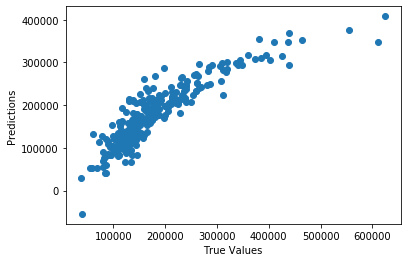

In [71]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## Decision Trees

In [72]:
from sklearn.tree import DecisionTreeRegressor


In [73]:
y_2.shape

(292,)

In [74]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)
regr_4 = DecisionTreeRegressor(max_depth=15)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [75]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)
real_prediction = regr_4.predict(df_test)

(292, 1)

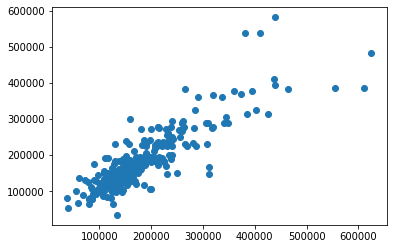

In [77]:
plt.scatter(y_test, y_4)
#plt.xlabel('True Values')
#plt.ylabel('Predictions')
y_test.shape

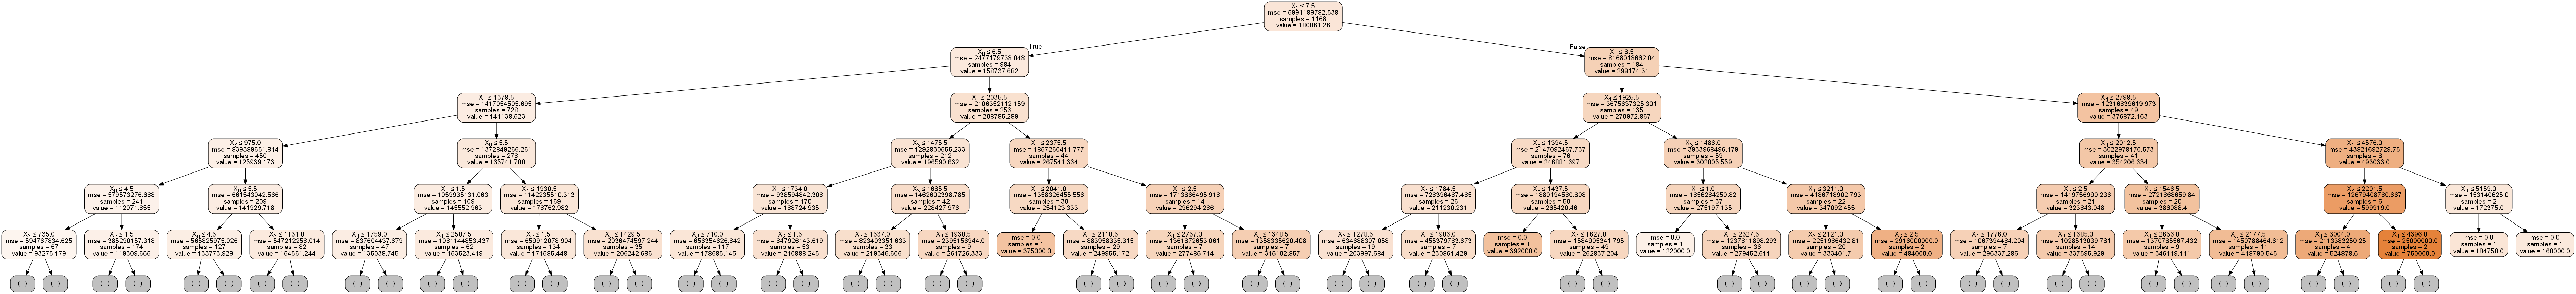

In [78]:
#visualizing decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(regr_4, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Support Vector Machine

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
#clf.fit(X_train, y_train.values.ravel())
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
real_prediction = clf.predict(df_test)

In [ ]:
plt.scatter(y_test, y_pred)
#plt.xlabel('True Values')
#plt.ylabel('Predictions')
y_test.shape

# Submission

In [ ]:
my_submission = pd.DataFrame({'Id': test['Id'], 'SalePrice':real_prediction})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_svm.csv', index=False)